In [1]:
from copy import deepcopy
from itertools import combinations
import typing as tp

import numpy as np
import pandas as pd
from numpy.linalg import lstsq
from scipy.optimize import linprog

from matplotlib import pyplot as plt
from citk.layer import Dense, FuzzyGMDHLayer
from citk.model import FFN, GMDH
from citk.functions import ReLU, Linear, BellMembership, GaussianMembership, Poly
from citk.losses import MSE, FMSE
from citk.optimisers import SGDOptimizer, SimplexOptimizer

from utils import get_and_process_boston_dataset, visualise_boston, seed_everything

%matplotlib inline

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

# Data

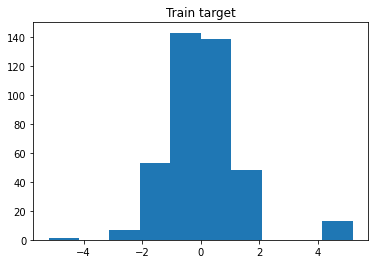

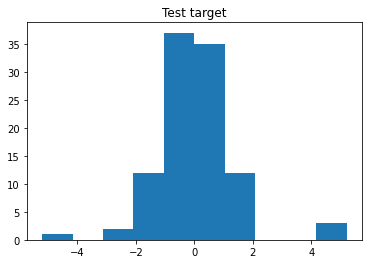

In [2]:
RANDOM_SEED = 42

seed_everything(RANDOM_SEED)

X_train, X_test, y_train, y_test = get_and_process_boston_dataset(random_state=RANDOM_SEED)

visualise_boston(X_train, X_test, y_train, y_test)

# GMDH 

In [3]:
model = GMDH(
            method_type='crisp', 
            poli_type='partial_quadratic',
            loss=MSE, 
            confidence=0.9,
        )

In [4]:
model, history, prediction, prediction_train  = model.fit(
    (X_train, y_train),
    (X_test, y_test),
    max_gmdh_layers=100,
    n_best_to_take=40,
    batch_size=64,
    verbose=True,
)


Layer: 0. Metric: 0.8402366028617546


/home/vsydorskyi/src/Neural_Net_Genetic_Alg/citk/model.py:333: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.W_vect = lstsq(X_train_tr, y_train[:,0])[0]



Layer: 1. Metric: 0.5949158710577419



Layer: 2. Metric: 0.5005433474087689



Layer: 3. Metric: 0.48878988805038814



Layer: 4. Metric: 0.46962387503884534



Layer: 5. Metric: 0.4668382442314325



Layer: 6. Metric: 0.43713380609290586



Layer: 7. Metric: 0.43994953798579406



# Predict and Visualise losses

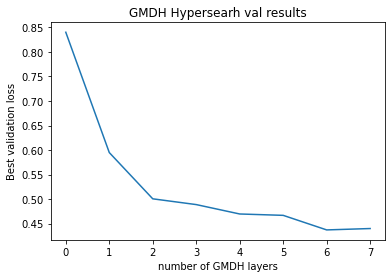

In [5]:
plt.title('GMDH Hypersearh val results')
plt.plot(history['metric'])
plt.xlabel('number of GMDH layers')
plt.ylabel('Best validation loss')
plt.show()

In [6]:
print(f"Test MSE: {MSE(y_test, prediction)[0]}")
print(f"Train MSE: {MSE(y_train, prediction_train)[0]}")

Test MSE: 0.43713380609290586
Train MSE: 0.6116624582736135


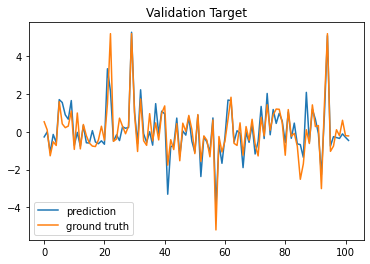

In [7]:
plt.title('Validation Target')
plt.plot(prediction, label='prediction')
plt.plot(y_test, label='ground truth')
plt.legend()
plt.show()

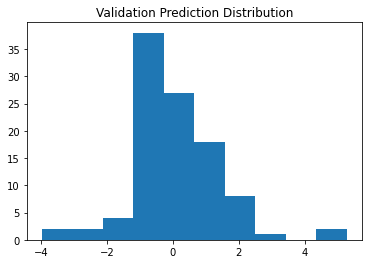

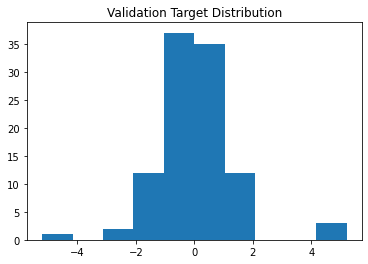

In [8]:
plt.title('Validation Prediction Distribution')
plt.hist(prediction)
plt.show()

plt.title('Validation Target Distribution')
plt.hist(y_test)
plt.show()